**Import common packages**

In [1]:
# Cell 1
import matplotlib.pyplot as plt
import numpy as np
from numba import njit

**Declare two `GLOBAL` variables**

In [2]:
# Cell 2
total_classes = 10_000
max_size = 80

**Define an `numba` accelerated function to test if any two students within a given class size share the same birthday**

In [3]:
# Cell 3
@njit
def shared_birthdays(class_size):
    b = np.random.randint(0, 365, class_size)
    for i in range(b.size - 2):
        for j in range(i + 1, b.size):
            if b[i] == b[j]:
                return True
    return False


shared_birthdays(class_size=20)

False

**Define an `numba` accelerated function to calculate the probability of having at least one shared birthday\
in 10,000 random classes of size ranging from 2 to 80 inclusive**

In [4]:
# Cell 4
def calc_probabilities():
    p = np.zeros(max_size + 1)
    for c in range(2, max_size + 1):
        n = 0
        for _ in range(total_classes):
            if shared_birthdays(c):
                n = n + 1
        p[c] = n / total_classes
    return p

**Find the minimize class size where the probability of a shared birthday > 50%**

In [5]:
# Cell 5
prob = calc_probabilities()
min_class_size = np.where(prob > 0.50)[0][0]
print(f"Min Class Size = {min_class_size}")

Min Class Size = 23


**Calculate the exact analytic probabilities for $2\leq n\leq 80$ students using this formula:**\
$p(n)\approx 1-e^-\frac{n^2}{730}$

In [6]:
# Cell 6
n = np.arange(2, max_size + 1)
p = 1.0 - np.exp(-(n**2) / 730)
print(n)
print(p)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80]
[0.00546447 0.01225308 0.02167936 0.0336668  0.04811883 0.06492009
 0.083938   0.10502447 0.12801783 0.15274488 0.17902307 0.20666274
 0.23546934 0.26524574 0.29579441 0.32691955 0.35842912 0.39013676
 0.42186346 0.45343913 0.48470395 0.51550954 0.5457198  0.57521171
 0.60387577 0.63161627 0.65835142 0.68401319 0.70854706 0.73191156
 0.75407772 0.77502834 0.79475721 0.81326825 0.83057458 0.84669754
 0.86166572 0.87551395 0.88828238 0.90001546 0.91076111 0.92056981
 0.92949381 0.93758643 0.94490135 0.95149204 0.95741122 0.96271041
 0.96743957 0.97164675 0.97537787 0.97867649 0.98158373 0.98413811
 0.98637557 0.98832943 0.99003044 0.99150683 0.99278438 0.99388653
 0.9948345  0.99564742 0.99634244 0.99693489 0.9974384  0.99786506
 0.99822552 0.9985291

**Graph both the discrete (estimated) and continuous (actual) probability curves**

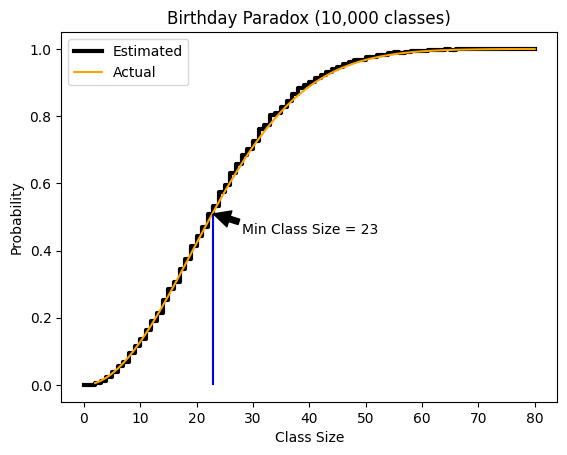

In [7]:
# Cell 7
plt.step(range(max_size + 1), prob, color="black",
         linewidth=3, label="Estimated")
plt.plot(n, p, color="orange", label="Actual")
plt.title(f"Birthday Paradox ({total_classes:,} classes)")
plt.xlabel("Class Size")
plt.ylabel("Probability")
plt.vlines(min_class_size, 0, prob[min_class_size], color="blue")
plt.annotate(
    f"Min Class Size = {min_class_size}",
    xy=(min_class_size, prob[min_class_size]),
    xytext=(28, 0.45),
    arrowprops={"facecolor": "black"},
)
plt.legend(loc="upper left")
plt.show()